## 1. Perceptrón a mano

a) Escriba una función que calcule el valor de salida (*output*) del modelo $f(x)$ para un patrón de entrada $x$ a través de los pesos $w$ del modelo. *Decida si incluir los bias dentro de $w$ o manejarlos de manera separada*.

In [1]:
import numpy as num;
def funcionSalida(entrada, pesos):
    y = num.dot(entrada,pesos)
    if(y>=0):
        return 1
    return 0

b) Escriba una función que implemente el clásico algoritmo del Perceptrón para un problema binario que permita entrenarlo en un conjunto de datos de tamaño  N , leídos de manera online (uno a uno). Recordar la decisión anterior sobre los bias.

In [10]:
def perceptron(conjunto_entrenamiento, bias, umbral, tasa_aprendizaje, size_input, datos_aciertos):
    pesos = []
    for i in range(size_input):
        pesos.append(0)
    pesos.append(1)
    aciertos=0
    aciertos_precision=0
    for vector_de_entrada, salida_deseada in conjunto_entrenamiento:
        resultado =  funcionSalida(vector_de_entrada,pesos)
        error = salida_deseada - resultado
        if error == 0: 
            aciertos+=1
        if error != 0:
            for indice, valor in enumerate(vector_de_entrada):
                pesos[indice] += tasa_aprendizaje * error * valor
            for vector_de_entrada2, salida_deseada2 in conjunto_entrenamiento:
                resultado = funcionSalida(vector_de_entrada2,pesos)
                if salida_deseada2 == resultado:
                    aciertos_precision+=1
            datos_aciertos.append((aciertos_precision/len(conjunto_entrenamiento)))
            aciertos_precision=0
                
                
    print("Cantidad de aciertos: " + str(aciertos))

c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset **Breast cancer wisconsin**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train, np.ones(N) ] #add columns of 1's if you want
```
Para evaluar los resultados mida la exactitud (*accuracy*) de la clasificación durante el entrenamiento (por cada iteración/instancia/dato) y grafique, utilice el conjunto de entrenamiento realizando una sola pasada (el objetivo de esta sección es familiarizarse con el algoritmo). Además reporte el tiempo de entrenamiento mediante el algoritmo implementado

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import time 
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = num.c_[X_train, num.ones(len(X_train))] #add columns of 1's if you want
vectores_input = []

for i in range(len(X_train)):
    vectores_input.append((X_train[i],y_train[i]))

bias = 0
umbral = 0
tasa_aprendizaje = 0.1
inicio = time.time()
datos_aciertos=[]
perceptron(vectores_input,bias,umbral,tasa_aprendizaje,30,datos_aciertos)
fin = time.time()
print("Tiempo transcurrido: " + str(fin-inicio) + " segundos")

Cantidad de aciertos: 535
Tiempo transcurrido: 0.10495138168334961 segundos


34


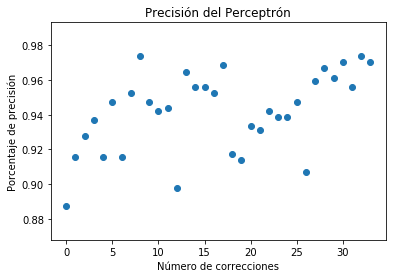

In [12]:
import matplotlib.pyplot as plt

print(len(datos_aciertos))
plt.title("Precisión del Perceptrón")
plt.xlabel("Número de correcciones")
plt.ylabel("Porcentaje de precisión")

plt.scatter(range(len(datos_aciertos)),datos_aciertos)
plt.show()

> d) Escriba una función que implemente el **Forgetrón** [[3]](#refs) con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $<a,b> = \sum_i a_i \cdot b_i$.

In [5]:
def K(a,b):
    return num.dot(a,b)

def nuevotreshold(x,y,i,indices):
    suma=0
    for k in indices:
        suma+=y[k]*K(i,x[k])
    if(suma>=0):
        return 1
    else:
        return 0

#### Se utilizo la misma estructura del perceptron, salvo que la función treshold se ve reemplazada por este nuevo modelo, con una memoria de 10. No se utilizan pesos directamente, y se hizo respecto a lo comprendido en el paper oficial, específicamente en la página 3, en el párrafo que esta antes del primer teorema, en el cual se detalla la función como la sumatoria respecto a los índices de fallo, la solución de aquel índice y los datos de ese índice.

In [6]:
def forgetron(conjunto_entrenamiento, bias, umbral, tasa_aprendizaje, size_input, datos_aciertos,tamaño,vecen,vecsal):
    pesos = []
    fallos=[]
    for i in range(size_input):
        pesos.append(0)
    pesos.append(1)
    aciertos=0
    aciertos_precision=0
    cont=0
    for vector_de_entrada, salida_deseada in conjunto_entrenamiento:
        cont+=1
        resultado = nuevotreshold(vecen,vecsal,vector_de_entrada,fallos)
        error = salida_deseada - resultado
        if error == 0: 
            aciertos+=1
        if error != 0:
            if(len(fallos)<=tamaño):
                fallos.append(cont)
            else:
                fallos.remove(fallos[0])
                fallos.append(cont)
            for vector_de_entrada2, salida_deseada2 in conjunto_entrenamiento:
                resultado = nuevotreshold(vecen,vecsal,vector_de_entrada2,fallos)
                if salida_deseada2 == resultado:
                    aciertos_precision+=1
            datos_aciertos.append((aciertos_precision/len(conjunto_entrenamiento)))
            aciertos_precision=0
                
                
    print("Cantidad de aciertos: " + str(aciertos))

In [7]:
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = num.c_[X_train, num.ones(len(X_train))] #add columns of 1's if you want
vectores_input = []

for i in range(len(X_train)):
    vectores_input.append((X_train[i],y_train[i]))

bias = 0
umbral = 0
tasa_aprendizaje = 0.1
inicio = time.time()
datos_aciertos=[]
forgetron(vectores_input,bias,umbral,tasa_aprendizaje,30,datos_aciertos,10,X_train,y_train)
fin = time.time()
print("Tiempo transcurrido: " + str(fin-inicio) + " segundos")

Cantidad de aciertos: 520
Tiempo transcurrido: 0.9134726524353027 segundos


49


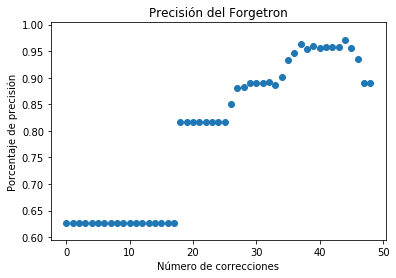

In [8]:
print(len(datos_aciertos))
plt.title("Precisión del Forgetron")
plt.xlabel("Número de correcciones")
plt.ylabel("Porcentaje de precisión")

plt.scatter(range(len(datos_aciertos)),datos_aciertos)
plt.show()

##### Se nota una distinción en como los modelos van aprendiendo y como su accuracy cambia. No hay una situación exacta para decidir cuál de los dos modelos es mejor que otro, depende del uso que se les de